In [53]:
import csv,pickle,time
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from utils import GeneSeg
from gensim.models.word2vec import Word2Vec
learning_rate=0.1
vocabulary_size=3000
batch_size=128
embedding_size=128
num_skips=4
skip_window=5
num_sampled=64
num_iter=5
plot_only=100
log_dir="word2vec.log"
plt_dir="/home/admin/xssdetection/file/word2vec.png"
vec_dir="/home/admin/xssdetection/file/word2vec.pickle"


start=time.time()
words=[]
datas=[]


In [54]:
with open("/home/admin/xssdetection/data/xssed.csv","r",encoding="utf-8") as f:
    reader=csv.DictReader(f,fieldnames=["payload"])
    for row in reader:
        payload=row["payload"]
        word=GeneSeg(payload)
        datas.append(word)
        words+=word



In [55]:
#构建数据集
def build_dataset(datas,words):
    count=[["UNK",-1]]
    counter=Counter(words)
    count.extend(counter.most_common(vocabulary_size-1))
    vocabulary=[c[0] for c in count]
    data_set=[]
    for data in datas:
        d_set=[]
        for word in data:
            if word in vocabulary:
                d_set.append(word)
            else:
                d_set.append("UNK")
                count[0][1]+=1
        data_set.append(d_set)
    return data_set
data_set=build_dataset(datas,words)



In [56]:
model=Word2Vec(data_set,size=embedding_size,window=skip_window,negative=num_sampled,iter=num_iter)
embeddings=model.wv

In [64]:
embeddings['0']

array([ 0.06356055, -0.19921948,  0.3356784 ,  0.15330128,  0.31883803,
       -0.6977568 ,  0.13472763, -0.39462927, -0.02651692,  0.97309947,
        1.0602285 , -0.07370728, -0.7246065 ,  0.06775752,  1.109377  ,
       -0.34577966,  0.42254186, -0.13481887, -0.24872543,  0.9183436 ,
       -1.4428607 , -0.10109176,  0.7711238 ,  0.67028177,  0.5955905 ,
       -0.18963751,  0.4201649 , -0.5992032 , -0.7136238 , -0.73436624,
       -0.3201587 ,  0.03583186, -0.68885845,  0.6004483 ,  0.4784428 ,
       -0.5739937 , -0.5768896 ,  0.6175184 , -0.3029108 ,  0.01734808,
        0.04042359,  0.76293707,  0.52277046,  0.4090956 ,  0.47357482,
       -0.5972618 ,  0.6259779 , -0.4994182 , -0.7634801 ,  1.6244601 ,
       -0.44355297,  0.7109609 ,  0.9468291 ,  0.2866395 ,  0.25637504,
       -0.53924143, -1.0911181 ,  0.4528728 , -0.43621692, -0.17867813,
       -1.0109166 , -0.44911763, -0.27320656,  0.23866493,  0.15664867,
        0.6409447 , -0.23423721, -0.1837575 ,  0.12108286,  0.11

/home/admin/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


100


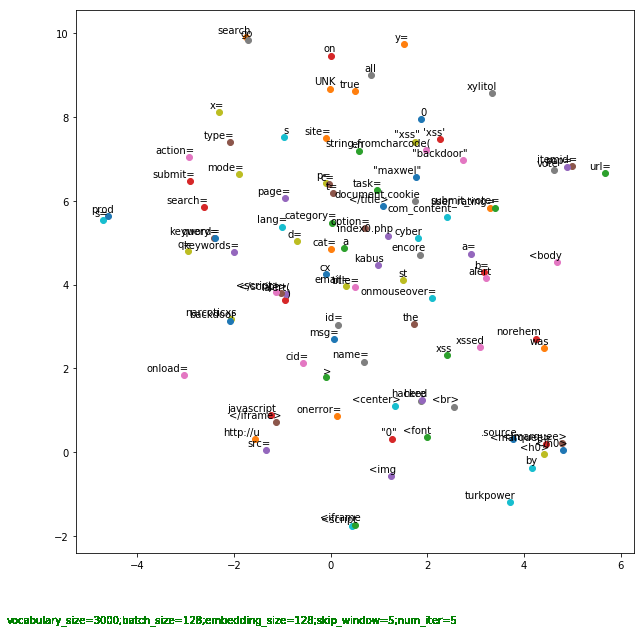

<Figure size 432x288 with 0 Axes>

In [57]:
def plot_with_labels(low_dim_embs,labels,filename=plt_dir):
    plt.figure(figsize=(10,10))
    for i,label in enumerate(labels):
        x,y=low_dim_embs[i,:]
        plt.scatter(x,y)
        plt.annotate(label,xy=(x,y),xytext=(5,2),
                     textcoords="offset points",
                     ha="right",
                     va="bottom")
        f_text="vocabulary_size=%d;batch_size=%d;embedding_size=%d;skip_window=%d;num_iter=%d"%(
            vocabulary_size,batch_size,embedding_size,skip_window,num_iter
        )
        plt.figtext(0.03,0.03,f_text,color="green",fontsize=10)
    plt.show()
    plt.savefig(filename)
tsne=TSNE(perplexity=30,n_components=2,init="pca",n_iter=5000)
plot_words=embeddings.index2word[:plot_only]
plot_embeddings=[]
for word in plot_words:
    plot_embeddings.append(embeddings[word])
low_dim_embs=tsne.fit_transform(plot_embeddings)
print(len(low_dim_embs))
plot_with_labels(low_dim_embs,plot_words)



In [62]:
def save(embeddings):
    dictionary=dict([(embeddings.index2word[i],i)for i in range(len(embeddings.index2word))])
    print(embeddings)
    #print(dictionary.keys())))
    reverse_dictionary=dict(zip(dictionary.values(),dictionary.keys()))
    word2vec={"dictionary":dictionary,"embeddings":embeddings,"reverse_dictionary":reverse_dictionary}
    with open(vec_dir,"wb") as f:
        pickle.dump(word2vec,f)
save(embeddings)
end=time.time()
print("Over job in ",end-start)
print("Saved words vec to",vec_dir)

1
Over job in  643.3869767189026
Saved words vec to /home/admin/xssdetection/file/word2vec.pickle
